In [6]:
# Dependencies
import pandas as pd
import statsmodels.api as sm
import requests


# Downloaded Output Files (CSV)
output_data_file = "output_data/obese.csv"
output_data_file = "output_data/alcohol.csv"


In [7]:
# Percentage of world adults population who are Obese and age 18+.
dt = pd.read_csv("output_data/obese.csv")

# Sort Percentage of US adults population who are Obese
ob_US = dt.groupby(['Entity'])
us = ob_US.get_group('United States')
usa = us[['Year', 'Share of adults who are obese (%)']] #.sort_values()
usa.columns = ['Year', 'Obesed_Adults(%)']
obese = usa.set_index(['Year'])
print(obese)

      Obesed_Adults(%)
Year                  
1975              11.9
1976              12.2
1977              12.6
1978              13.0
1979              13.3
1980              13.7
1981              14.1
1982              14.6
1983              15.0
1984              15.5
1985              16.0
1986              16.5
1987              17.0
1988              17.5
1989              18.1
1990              18.7
1991              19.3
1992              19.9
1993              20.6
1994              21.2
1995              21.9
1996              22.6
1997              23.3
1998              24.1
1999              24.8
2000              25.5
2001              26.2
2002              26.9
2003              27.6
2004              28.3
2005              29.0
2006              29.7
2007              30.3
2008              31.0
2009              31.7
2010              32.3
2011              33.0
2012              33.6
2013              34.3
2014              34.9
2015              35.6
2016       

In [8]:
# USA alcohol Consumption (litres per person)
al = pd.read_csv("output_data/alcohol.csv")


# Sort for alc columns of Spirit and bear (litres per person)
dt = al[['Year', 'Spirits (litres per person)', 'Beer (litres per person)']]
dt.columns = ['Year', 'Spirits', 'Beer']
alc = dt.set_index(['Year'])
print(alc)

      Spirits  Beer
Year               
1850     7.12  0.53
1860     8.18  1.02
1870     5.79  1.67
1880     3.86  2.12
1890     3.60  3.41
...       ...   ...
2009     2.80  4.43
2010     2.80  4.32
2011     2.88  4.24
2012     2.95  4.28
2013     3.03  4.24

[94 rows x 2 columns]


In [16]:
#  Read from url the population of US adults, age 18 and above
url= 'https://datacenter.kidscount.org/rawdata.axd?ind=99&loc=1'
sd= pd.read_excel('https://datacenter.kidscount.org/rawdata.axd?ind=99&loc=1')


In [17]:
# Clean up population of us adults,age 18+ to extract data (popn) which we need 
ss = sd.groupby(['LocationType'])
dh = ss.get_group('Nation')
hj = dh.groupby(['DataFormat'])
kl = hj.get_group('Number')
hk = kl.groupby(['Child and Adult Populations'])
gh = hk.get_group('Age 18 and over')

data = gh[['TimeFrame', 'Data']]
data.columns = ['Year', '18+ Popn']
popn = data.set_index(['Year'])
print(popn)

       18+ Popn
Year           
1990  185404302
1991  187667924
1992  190005054
1993  192323657
1994  194484890
1995  196805263
1996  199160779
1997  201726194
1998  204422710
1999  207094130
2000  209786222
2001  212297780
2002  214688736
2003  217007175
2004  219507563
2005  221992930
2006  224622198
2007  227211802
2008  229989364
2013  242487853
2018  253768092
2009  232637362
2010  235205315
2015  247122998
2011  237671945
2012  240176663
2014  244821329
2016  249421641
2017  251564106


In [18]:
# Remove % from Obesed_Adults (%) and Establish ob_popn in the DataFrame of variables for Regression Analysis
data = pd.concat([obese, popn, alc], axis=1).dropna()
data["18+ Popn"] = pd.to_numeric(data["18+ Popn"])
data['ob_popn'] = data['Obesed_Adults(%)'] / 100 * data['18+ Popn'] 
# Joint plot for ob_popn vs Spirit and Beer 
dgf = data[['Spirits', 'Beer', 'ob_popn']].pct_change().dropna()




      Obesed_Adults(%)   18+ Popn  Spirits  Beer       ob_popn
Year                                                          
1990              18.7  185404302     2.91  5.07  3.467060e+07
1991              19.3  187667924     2.69  4.88  3.621991e+07
1992              19.9  190005054     2.69  4.88  3.781101e+07
1993              20.6  192323657     2.57  4.77  3.961867e+07
1994              21.2  194484890     2.46  4.73  4.123080e+07
1995              21.9  196805263     2.38  4.66  4.310035e+07
1996              22.6  199160779     2.38  4.66  4.501034e+07
1997              23.3  201726194     2.35  4.62  4.700220e+07
1998              24.1  204422710     2.35  4.62  4.926587e+07
1999              24.8  207094130     2.35  4.66  5.135934e+07
2000              25.5  209786222     2.42  4.62  5.349549e+07
2001              26.2  212297780     2.42  4.66  5.562202e+07
2002              26.9  214688736     2.42  4.66  5.775127e+07
2003              27.6  217007175     2.54  4.58  5.989

In [22]:
# Establish the regression model: Y=f(X)
y = dgf["ob_popn"]
X = sm.add_constant(dgf[['Spirits', 'Beer']])

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


C:\Users\abued\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ob_popn   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     6.163
Date:                Wed, 11 Dec 2019   Prob (F-statistic):            0.00822
Time:                        12:17:22   Log-Likelihood:                 91.952
No. Observations:                  23   AIC:                            -177.9
Df Residuals:                      20   BIC:                            -174.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0396      0.001     33.037      0.000       0.037       0.042
Spirits       -0.1314      0.038     -3.483      0.002      -0.210      -0.053
Beer           0.0643      0.083      0.773      0.449      -0.109       0.238
==============================================================================
Omnibus:                        0.647   Durbin-Watson:                   1.175
Prob(Omnibus):                  0.724   Jarque-Bera (JB):                0.644
Skew:                          -0.042   Prob(JB):                        0.725
Kurtosis:                       2.184   Cond. No.                         85.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Try to solev the problem of auto-correlation with difference equation method

dgf[['lagBeer', 'lagSpirits']] = dgf[['Beer', 'Spirits']].shift(1)
reg = dgf[['lagBeer', 'lagSpirits']].dropna()

reg = dgf[['ob_popn', 'lagBeer', 'lagSpirits']].dropna()

dgf[['lagBeer', 'lagSpirits']] = dgf[['Beer', 'Spirits']].shift(1).dropna()

reg = dgf[['ob_popn', 'lagBeer', 'lagSpirits']].dropna()
# Regression Analysin
y = reg["ob_popn"]
X = sm.add_constant(reg[['lagBeer', 'lagSpirits']])
print(reg)


       ob_popn   lagBeer  lagSpirits
Year                                
1992  0.043929 -0.037475   -0.075601
1993  0.047808  0.000000    0.000000
1994  0.040691 -0.022541   -0.044610
1995  0.045344 -0.008386   -0.042802
1996  0.044315 -0.014799   -0.032520
1997  0.044254  0.000000    0.000000
1998  0.048161 -0.008584   -0.012605
1999  0.042493  0.000000    0.000000
2000  0.041592  0.008658    0.000000
2001  0.039752 -0.008584    0.029787
2002  0.038281  0.008658    0.000000
2003  0.037102  0.000000    0.000000
2004  0.037177 -0.017167    0.049587
2005  0.036338  0.000000    0.011811
2006  0.036268 -0.017467    0.031128
2007  0.031964  0.008889    0.015094
2008  0.035609  0.008811    0.014870
2009  0.034354 -0.008734    0.010989
2010  0.030175 -0.024229    0.014493
2011  0.032386 -0.024831    0.000000
2012  0.028912 -0.018519    0.028571
2013  0.030657  0.009434    0.024306


In [24]:
# Note the difference in argument order
model = sm.OLS(y, X).fit()
# make the predictions by the model
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ob_popn   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     5.909
Date:                Wed, 11 Dec 2019   Prob (F-statistic):             0.0101
Time:                        12:17:42   Log-Likelihood:                 88.063
No. Observations:                  22   AIC:                            -170.1
Df Residuals:                      19   BIC:                            -166.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0394      0.001     32.782      0.000       0.037       0.042
lagBeer        0.1040      0.084      1.245      0.228      -0.071       0.279
lagSpirits    -0.1325      0.039     -3.438      0.003      -0.213      -0.052
==============================================================================
Omnibus:                        2.091   Durbin-Watson:                   1.376
Prob(Omnibus):                  0.351   Jarque-Bera (JB):                1.363
Skew:                           0.354   Prob(JB):                        0.506
Kurtosis:                       2.007   Cond. No.                         83.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

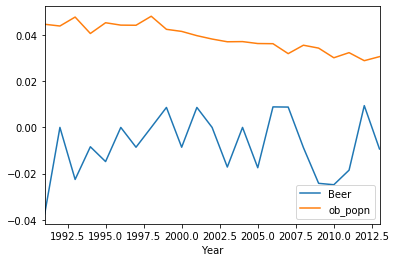

In [25]:
# plot for ob_popn vs bear relationship
dgf[['Beer', 'ob_popn']].plot()



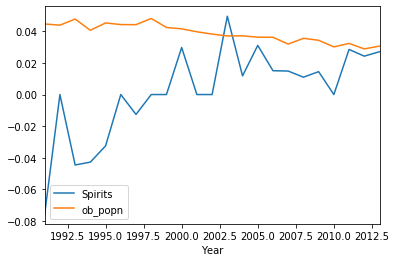

In [26]:
#plot for ob_popn vs Spirit relationship
dgf[['Spirits', 'ob_popn']].plot()

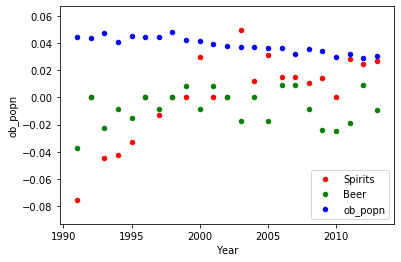

In [27]:
# Scatter plot for all variables
dc = dgf.reset_index()
ax1 = dc.plot(kind='scatter', x='Year', y='Spirits', color='r', label='Spirits')   
ax2 = dc.plot(kind='scatter', x='Year', y='Beer', color='g', label='Beer', ax=ax1)    
ax3 = dc.plot(kind='scatter', x='Year', y='ob_popn', color='b', label='ob_popn', ax=ax1)

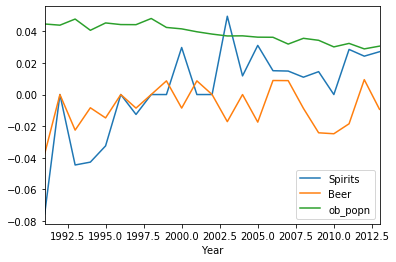

In [28]:
# Joint plot for ob_popn vs Spirit and Beer 
dgf = data[['Spirits', 'Beer', 'ob_popn']].pct_change().dropna()
dgf.plot()